In [1]:
import pandas as pd
import io
import requests
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

pd.options.display.max_columns = 50

Tests covered in Chatper 9:
1. Sign Test
2. Wilcoxon Signed-Rank Test
3. Wilcoxon Rank-Sum Test

# Sign Test

**Use Case**:
The sign test can be used when you want to perform hypothesis testing using ordinal data that has 3 states. For example, if we wanted to compare video games high scores for two people, A & B, where person A's high score is either greater than, less than, or equal to person B's high score.

**In the sign test, we're basically taking two, paired samples (taking n people and observing the effect of applying a treatment) and re-casting that data into a single sample *of differences* (i.e. was there an improvement, deterioration, or no effect at all?).**

***Then we test to see if the difference is non-zero.***

Since we've recasted the problem as a single sample of differences by calculating a difference d<sub>i</sub> for each sample. We want to test whether the difference is positive or not, we get a binomial distributed random variable (0 = no difference, 1 = positive difference).

See https://en.wikipedia.org/wiki/Sign_test for more info.

**Assumptions:**
1. The differences d<sub>i</sub> are assumed to be independent.
2. Each difference d<sub>i</sub> comes from the same continuous population (i.e. the data is paired).
3. The values x<sub>i</sub> and y<sub>i</sub> represent are ordered (at least the ordinal scale), so the comparisons "greater than", "less than", and "equal to" are meaningful.
4. n >= 20 (where n is the # of non-zero d<sub>i</sub>'s)

**Hypotheses:**<br>
H0: ∆ = 0<br>
Ha: ∆ != 0<br>
*Where ∆ is the population median of d<sub>i</sub>, and d<sub>i</sub> is the sign of the difference in observations (x<sub>i</sub> - y<sub>i</sub>).*

and a p-value of < 0.05 means that the two samples come from different populations (with type I error threshold = 0.05)

alternatively:

Let p = Pr(X > Y), and then test the null hypothesis <br>
H0: p = 0.50 <br>
Ha: p != 0.50 

**Alternative tests**:<br>
If the data is continuous, then a t-test is more appropriate.<br>
If the data is ranked, a wilcoxon signed-rank test is more appropriate. 

**Mechanics**:<br>
1. Python:<br>

2. R:<br>
`prop.test(x=18, n=45, p=0.5, alternative="two.sided", conf.level=0.95, correct=TRUE)`<br>
x = # of samples where d<sub>i</sub> > 0<br>
n = # of samples where d<sub>i</sub> != 0<br>

In [60]:
from statsmodels.stats.proportion import proportions_ztest
count = 18
nobs = 40
value = 0.5
proportions_ztest(count, nobs, value, alternative='two-sided', prop_var=False)

(-0.635641726163728, 0.5250099664186034)

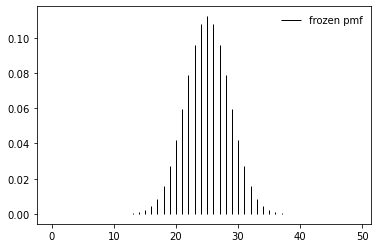

In [53]:
from scipy.stats import binom

n = 50
p = 0.50
rv = binom(n, p)
# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x = np.arange(start=0, stop=n, step=1)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

# Wilcoxon Signed-Rank Test

The Wilcoxon Signed-Rank Test is a non-parametric hypothesis test that can test the magnitude of differences (and not just the sign, like in the Sign Test).

**Analogous to the paired t-test for ordinal data (i.e. a non-parametric test).**

The test is based on the sum of the ranks, or the rank sum (R<sub>1</sub>), for the group of people with positive d<sub>i</sub> (the rank sum for people for whom treatment A is not as good as treatment B)

**Assumptions**:
1. n >= 16 (where n is the # of non-zero d<sub>i</sub>'s, as then the normal approximation can be used for the sampling distribution of R<sub>1</sub>)
2. Continuous, symmetric (but not necessarily normal) distribution

**Hypothesis Testing**:<br>
H0: ∆ = 0<br>
Ha: ∆ != 0<br>
*Where ∆ is the population median of d<sub>i</sub>, and d<sub>i</sub> is the difference in observations (x<sub>i</sub> - y<sub>i</sub>).*

*More generally:<br>*
H0: the distribution of the differences d<sub>i</sub> are symmetric around 0<br>
Ha: the distribution of the differences d<sub>i</sub> are not symmetric around 0

**Alternative Tests**
1. Sign Test, if magnitude of differences it not a concern, however the sign test has less power than the Wilcoxon Signed-Rank test
2. For cardinal data that is normally distributed, the Paired t-test will have more power. 

**Mechanics**:
1. Python<br>
`scipy.stats.wilcoxon(x, y=None, zero_method='wilcox', correction=True, alternative='two-sided')`
2. R <br>
One set of paired differences: <br>
`wilcox.test(x, y = NULL, alternative = "two-sided", mu = 0, paired = FALSE, exact = NULL, correct = TRUE, conf.int = FALSE)`<br>
Two sets of paired scores:<br>
`wilcox.test(x, y, alternative = "two-sided", mu = 0, paired = FALSE, exact = NULL, correct = TRUE, conf.int = FALSE)`

# Wilcoxon Rank-Sum Test

**Nonparametric analog to t test for two independent samples.**

*Also sometimes known as the Mann-Whitney U test*

**Mechanics**:
1. Python<br>
2. R <br>
`wilcox.test(x, y, alternative = "two-sided", mu=0, paired = FALSE, exact = NULL, correct = TRUE, conf.int = FALSE)`<br>

In a study, 28 adults with mild periodontal disease are assessed before and 6 months after implementation of a dental-education program intended to promote better oral hygiene. After 6 months, periodontal status improved in 15 patients, declined in 8, and remained the same in 5.

*9.1 Assess the impact of the program statistically (use a two-sided test).
Suppose patients are graded on the degree of change in periodontal status on a 7-point scale, with +3 indicating the greatest improvement, 0 indicating no change, and −3 indi- cating the greatest decline. The data are given in Table 9.9.

9.2 What nonparametric test can be used to determine whether a significant change in periodontal status has occurred over time?

9.3 Implement the procedure in Problem 9.2, and report a p-value.